#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 2
#### Topics:
- Probability review
- Distributional Properties of the Linear Model


#### Due: 05/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)

1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim \Ncal(\mu, I_9)$ where $\mu \in \reals^9$. Show that $Z_1+Z_2+Z_3+Z_4$ is independent of $Z_1 + Z_2 - Z_3 - Z_4 - Z_5$.

2. Suppose that $Z \sim \Ncal(\mu, I_n)$ and let $X = AZ$ and $Y = BZ$ for non-random matrices $A$ and $B$. Find conditions on $A$ and $B$ such that $X$ independent of $Y$.

3. Suppose that $Z_{ij} \simiid \Ncal(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
    - Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
    - Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
    - Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & .25 \\
.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivaraite normal distribution $\Ncal(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a sactter plot. 

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 0 \leq y \leq 2x\}
$$
For $(X_1, X_2) \sim \Ncal(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. By evaluating the integral over the Gaussian density function
    2. By estimating the fraction of samples in 4 that falls in the region $A$


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import iqr
import scipy.stats as stats

%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)

#### Question 4

In [81]:
MAX_ITER = 100000000
print_freq = 100  # iterations

# question 4
def create_samples_multivariate(wanted_cov=0.25, size=1000):
    samples_normal = np.random.normal(loc=0, scale=1, size=size*1000)
    
    permute_half = np.random.permutation(size // 2)
    Z1 = samples_normal[permute]
    
    permute_half = np.random.permutation(size // 2)
    Z2 = list(samples_normal[permute_half])
    
    sample_cov = np.cov(Z1, np.array(Z2))[0][1]
    index_to_replace = 0
    for i in range(MAX_ITER):        
        temp_sample = samples_normal[np.random.randint(0, size*1000)]
        
        temp_Z2 = Z2.copy()
        temp_Z2[index_to_replace] = temp_sample
        temp_Z2 = np.array(temp_Z2)
        temp_sample_cov = np.cov(Z1, temp_Z2)[0][1]
        
            
        if (temp_sample_cov > sample_cov and sample_cov < wanted_cov) or (temp_sample_cov < sample_cov and sample_cov > wanted_cov):
            index_to_replace += 1
            Z2 = temp_Z2
            sample_cov = temp_sample_cov
            
        if wanted_cov - 0.002 <= sample_cov <= wanted_cov + 0.002:
            print(f"\n\nFinished at iteration: {i}, with cov={sample_cov}")
            break
        
        if i % print_freq == 0:
            print(f"Iteration={i}, Cov={sample_cov}")
            
    return Z1, Z2, sample_cov
                  
Z1, Z2, cov = create_samples_multivariate()  

Iteration=0, Cov=0.044629551569677614
Iteration=100, Cov=0.09027273961614317
Iteration=200, Cov=0.1051693323301262
Iteration=300, Cov=0.12180754831214503
Iteration=400, Cov=0.1289851207908235
Iteration=500, Cov=0.14785733978901106
Iteration=600, Cov=0.17648585984117773
Iteration=700, Cov=0.19219601609358253
Iteration=800, Cov=0.20529213453116393


Finished at iteration: 890, with cov=0.24842602588577636


In [35]:
MAX_ITER = 100000000
print_freq = 10000  # iterations
# question 4
def create_samples_multivariate(wanted_cov=0.25, size=1000):
    samples_normal = np.random.normal(loc=0, scale=1, size=size*1000)
    permute = np.random.permutation(size // 2)
    
    Z1 = samples_normal[permute]
    new_permute = np.random.permutation(size // 2)
    Z2 = samples_normal[new_permute]
    
    sample_cov = np.cov(Z1, Z2)[0][1]
    for i in range(MAX_ITER):
        new_permute = np.random.permutation(size // 2)
        Z2 = samples_normal[new_permute]
        sample_cov = np.cov(Z1, Z2)[0][1]
        
        if wanted_cov - 0.03 <= sample_cov <= wanted_cov + 0.03:
            print(f"Finished at iteration: {i}, with cov={sample_cov}")
            break
        
        # if i % print_freq == 0:
        #     print(f"Cov={sample_cov}")
            
    return Z1, Z2, cov
                  
Z1, Z2, cov = create_samples_multivariate()   
cov

Finished at iteration: 286176, with cov=0.22415502290064504


NameError: name 'cov' is not defined

In [ ]:
plt.plot(Z1, Z2, 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between Z1 and Z2 = 0.25')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.axis('equal')

Let's try with numpy built-in function as well:

(-4.067059042935487, 3.790752204038932, -3.5979073773772483, 3.07412510376157)

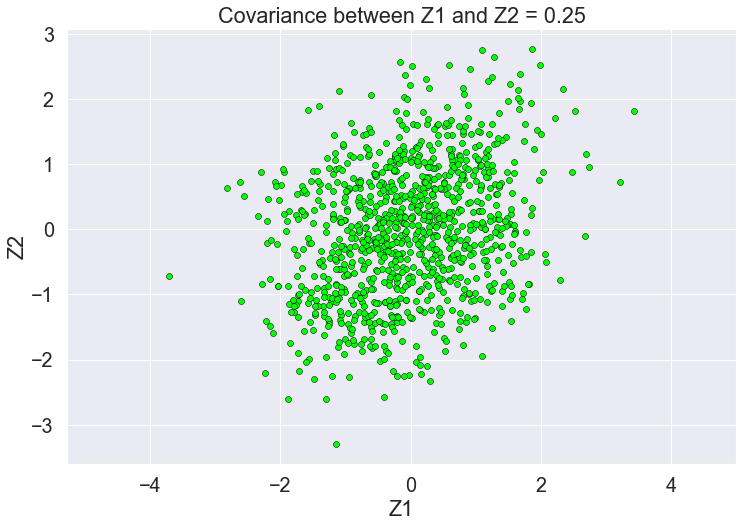

In [10]:
SIZE = 1000
MEAN = np.array([0, 0])
COV = [
    [1, 0.25],
    [0.25, 1]
]
samples_multivariate = np.random.multivariate_normal(mean=MEAN, cov=COV, size=SIZE)


plt.plot(samples_multivariate[:,0], samples_multivariate[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.title(f'Covariance between Z1 and Z2 = 0.25')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.axis('equal')

## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$


For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \Ncal\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & 1 & 3 \\
 1 & 2 & 3 \\
 3 & 3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=2, X=3)$
<hr>
<hr>

## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \sim N(0, 1)$. 
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (the point, we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


## Problem 4 (Model fitting and t-Test)
Cosnider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

/bin/bash: kaggle: command not found
unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [3]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

FileNotFoundError: [Errno 2] No such file or directory: 'house-prices/train.csv'

Consider predicting ``SalePrice`` via a linear model with predictors:

In [21]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>